In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats


**read_csv to datafram**

In [4]:
df = pd.read_csv (r'users_file.csv',sep='\t')
df.head()

,avatar_url,city,comments_count,country_code,created_at,description,first_name,followers,followers_count,followings,...,station_urn,track_count,uri,urn,user_albums,user_playlist_without_albums,user_top_tracks,user_tracks,username,verified
0,https://i1.sndcdn.com/avatars-000723723973-qtb...,NaN,0,FR,2016-10-12T22:04:43Z,NaN,NaN,235133933,3,"138934049,605567652,235133933,261197982,604286",...,soundcloud:system-playlists:artist-stations:26...,0,https://api.soundcloud.com/users/261128192,soundcloud:users:261128192,NaN,"314247842,593639301,321596631,266859227,296074...",NaN,NaN,adèle,False
1,https://i1.sndcdn.com/avatars-000507859965-mpc...,NaN,0,NaN,2017-10-16T15:41:53Z,NaN,NaN,NaN,0,"141687168,5603465,21113102,96841112,14830753,3...",...,soundcloud:system-playlists:artist-stations:33...,0,https://api.soundcloud.com/users/338315266,soundcloud:users:338315266,NaN,NaN,NaN,NaN,adele,False
2,https://i1.sndcdn.com/avatars-000270857665-bnc...,NaN,0,NaN,2016-05-18T09:17:14Z,NaN,NaN,NaN,3,267075468,...,soundcloud:system-playlists:artist-stations:22...,0,https://api.soundcloud.com/users/227758087,soundcloud:users:227758087,NaN,327168347,NaN,NaN,Adele,False
3,https://i1.sndcdn.com/avatars-000242997710-jw1...,NaN,0,NaN,2016-07-30T15:12:11Z,NaN,Adele,"459549,244431741",6,NaN,...,soundcloud:system-playlists:artist-stations:24...,0,https://api.soundcloud.com/users/244316169,soundcloud:users:244316169,NaN,NaN,NaN,NaN,Adele,False
4,https://a1.sndcdn.com/images/default_avatar_la...,NaN,0,NaN,2021-09-12T23:53:30Z,NaN,Аделина,NaN,0,NaN,...,soundcloud:system-playlists:artist-stations:10...,0,https://api.soundcloud.com/users/1029605386,soundcloud:users:1029605386,NaN,NaN,NaN,NaN,Adele,False


### Correlation matrix: comment, duration, like, repost, download, playback

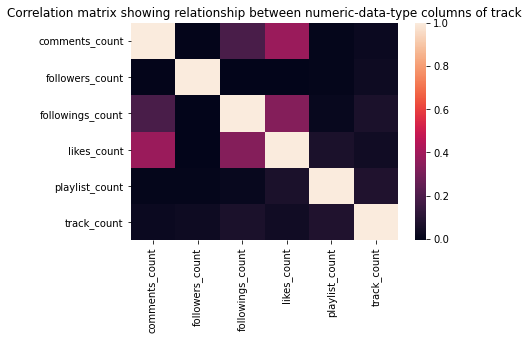

In [3]:
df1 = df[['comments_count','followers_count','followings_count','likes_count','playlist_count','track_count']]
sns.heatmap(df1.corr())
plt.title('Correlation matrix showing relationship between numeric-data-type columns of track');

### Distplot: Followers_count

/Users/lanmac/opt/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lanmac/opt/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


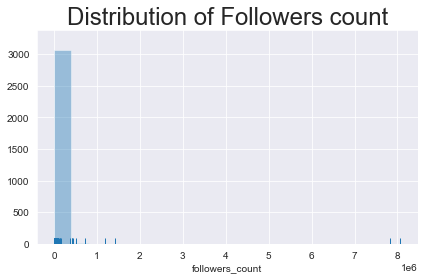

In [4]:
sns.set_style('darkgrid');
sns.distplot(df.followers_count, bins=20, kde=False, rug=True,label = 'Distribution of Followers count');

# Set title for plot
plt.title( "Distribution of Followers count" , size = 24 ) 
# Display figure
plt.tight_layout()

### KDEplot: Track_count vs. Followers_count

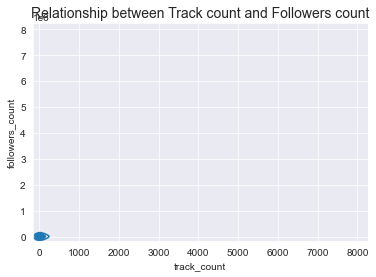

In [5]:
ax = sns.kdeplot(data=df,x = 'track_count',y = 'followers_count')
ax.set_title("Relationship between Track count and Followers count",size = 14);

### Histogram: followings_count

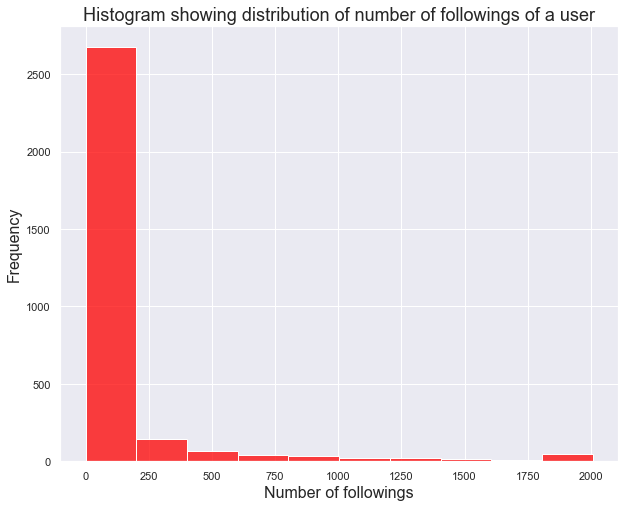

<Figure size 720x576 with 0 Axes>

In [15]:
sns.set(style="darkgrid")
sns.histplot(data=df['followings_count'], kde=False, color='red', bins=10)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Histogram showing distribution of number of followings of a user', fontsize=18)
plt.xlabel('Number of followings', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

### Scatterplot: likes_count vs comments_count

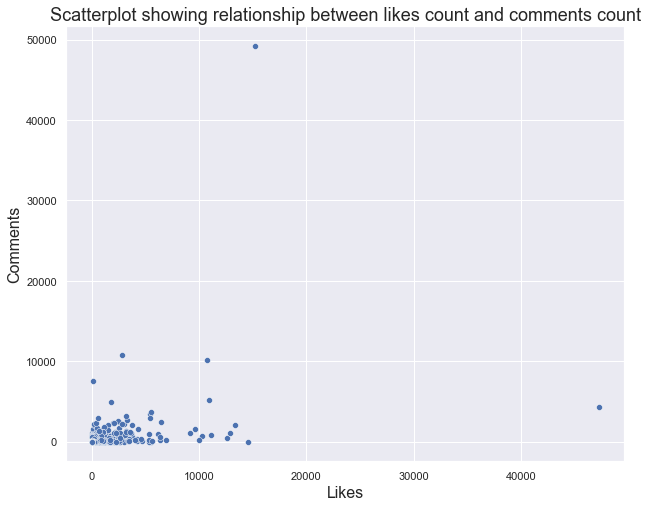

<Figure size 720x576 with 0 Axes>

In [31]:
sns.set_style('darkgrid');
p = sns.scatterplot(x=df['likes_count'],y=df['comments_count'])
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Likes', fontsize=16)
plt.ylabel('Comments', fontsize=16)
plt.title('Scatterplot showing relationship between likes count and comments count', fontsize=18)
plt.show()
plt.clf()

### Histogram: created_at

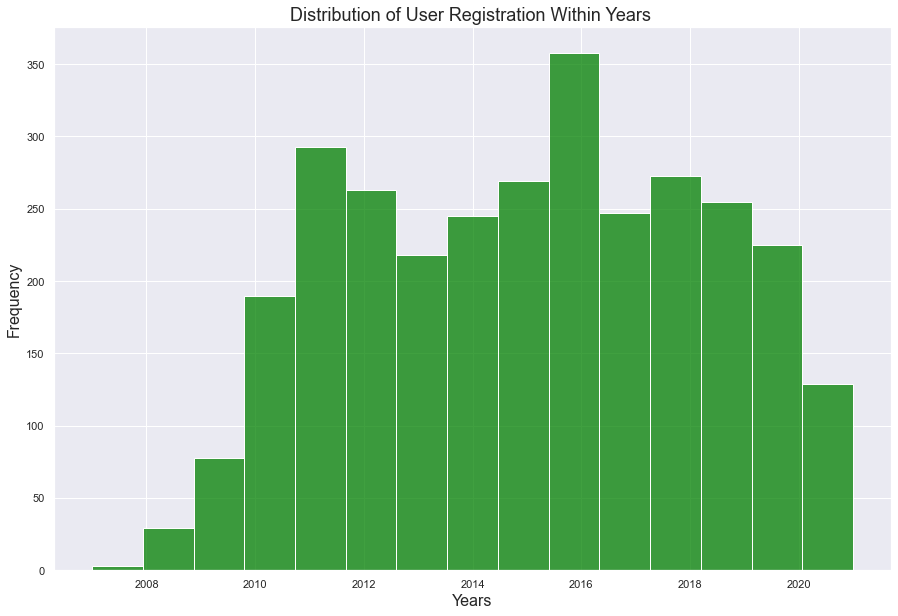

<Figure size 720x576 with 0 Axes>

In [8]:
sns.set(style="darkgrid")
sns.histplot(data=df['created_at'].dt.year, kde=False, color='green', bins=15)
sns.set(rc={'figure.figsize':(10,8)})
plt.title('Distribution of User Registration Within Years ', fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()
plt.clf()

### Scatterplot: followings_count Vs. followers_count

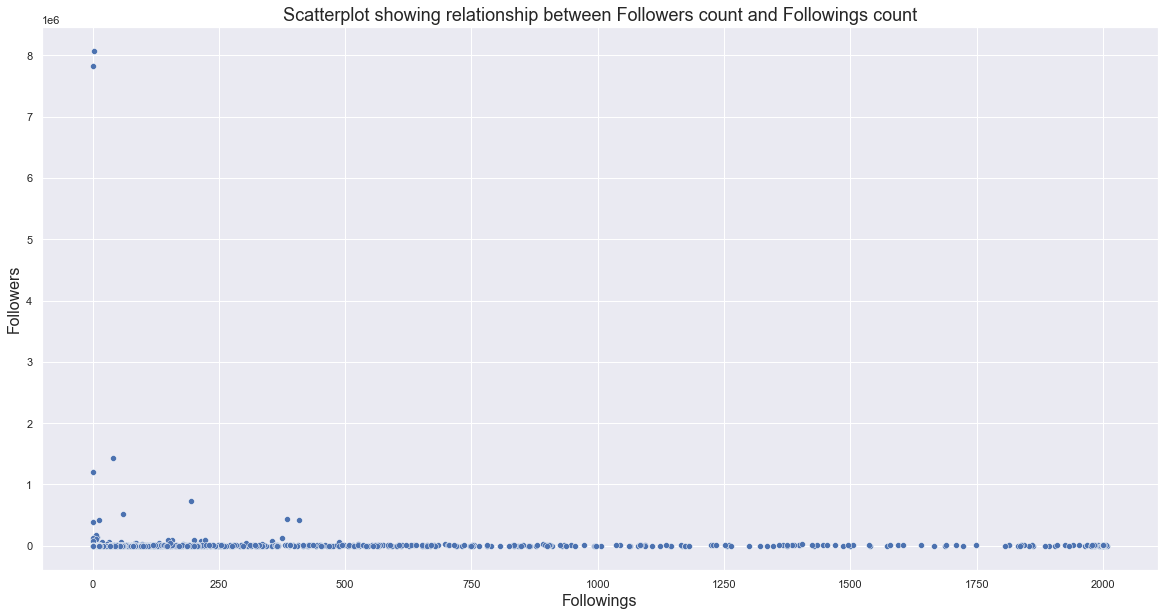

<Figure size 1440x720 with 0 Axes>

In [9]:
sns.set_style('darkgrid');
sns.set(rc={'figure.figsize':(20,10)})
p = sns.scatterplot(x=df['followings_count'],y=df['followers_count'])
sns.set(style="darkgrid")
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Followings', fontsize=16)
plt.ylabel('Followers', fontsize=16)
plt.title('Scatterplot showing relationship between Followers count and Followings count', fontsize=18)
plt.show()
plt.clf()